In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
test_data=pd.read_csv("test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
test_data.drop(columns=["Name", "Ticket","Cabin"], inplace=True)
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [4]:
train_data=pd.read_csv("train.csv")
train_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data['Fare'].mean()

32.2042079685746

In [7]:
train_data.drop(columns=["Name", "Ticket","Cabin","Embarked"], inplace=True)
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,NaN,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


In [8]:
train_data.count()

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            714
SibSp          891
Parch          891
Fare           891
dtype: int64

In [9]:
train_data.loc[(train_data["Survived"]==1)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
8,9,1,3,female,27.0,0,2,11.1333
9,10,1,2,female,14.0,1,0,30.0708
...,...,...,...,...,...,...,...,...
875,876,1,3,female,15.0,0,0,7.2250
879,880,1,1,female,56.0,0,1,83.1583
880,881,1,2,female,25.0,0,1,26.0000
887,888,1,1,female,19.0,0,0,30.0000


In [10]:
male_s=(train_data['Sex']=='male') & (train_data['Survived']==1)
female_s=(train_data['Sex']=='female') & (train_data['Survived']==1)
male_s

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889     True
890    False
Length: 891, dtype: bool

In [11]:
x=male_s.value_counts().tolist()
y=female_s.value_counts().tolist()
print(y)
x


[658, 233]


[782, 109]

In [12]:
x=(train_data["Survived"]==1)

In [13]:
x

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [14]:
x=train_data[(train_data['Survived']==1)]


In [15]:
x

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
8,9,1,3,female,27.0,0,2,11.1333
9,10,1,2,female,14.0,1,0,30.0708
...,...,...,...,...,...,...,...,...
875,876,1,3,female,15.0,0,0,7.2250
879,880,1,1,female,56.0,0,1,83.1583
880,881,1,2,female,25.0,0,1,26.0000
887,888,1,1,female,19.0,0,0,30.0000


<BarContainer object of 2 artists>

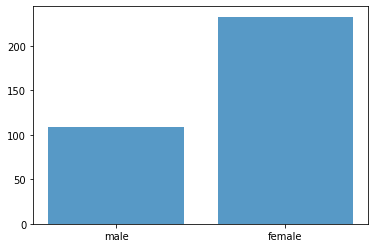

In [16]:
male_s=len(train_data[(train_data['Sex']=='male') & (train_data['Survived']==1)])
female_s=len(train_data[(train_data['Sex']=='female') & (train_data['Survived']==1)])
Sex=['male', 'female']
Survived=['No','Yes']
plt.bar(Sex, [male_s, female_s], align='center', alpha=0.75)


([<matplotlib.patches.Wedge at 0x2e1cdb62448>,
 [Text(-0.9838646807152013, -0.4919454136803953, 'male'),
  Text(0.9838646346559433, 0.4919455057964524, 'female')],
 [Text(-0.5366534622082916, -0.2683338620074883, '64.8%'),
  Text(0.53665343708506, 0.2683339122526104, '35.2%')])

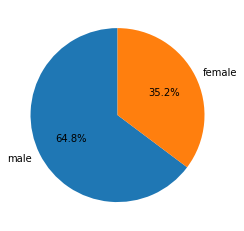

In [17]:
gender_ratio=[train_data.Sex[train_data['Sex']=='male'].count(), train_data.Sex[train_data['Sex']=='female'].count()]
gender_ratio
plt.pie(gender_ratio, labels=Sex, startangle=90,autopct='%.1f%%')

In [18]:
fare_s=train_data.groupby('Survived').Fare.mean().tolist()
fare_s

[22.117886885245877, 48.39540760233917]

[22.117886885245877, 48.39540760233917]


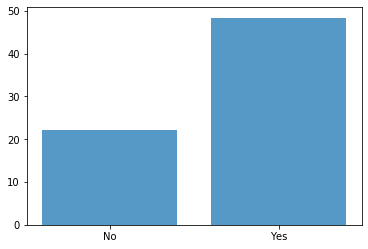

In [19]:
plt.bar(Survived, fare_s, align='center', alpha=0.75)
print(fare_s)

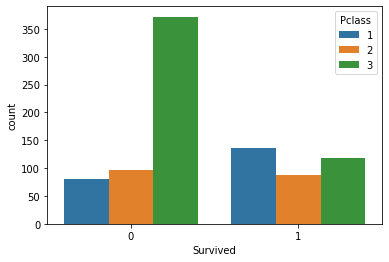

In [20]:
sns.countplot(x='Survived', hue='Pclass', data=train_data)

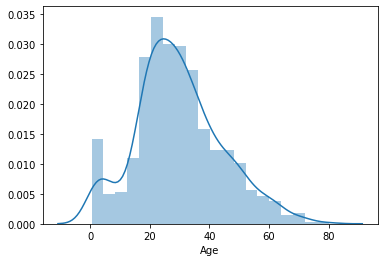

In [21]:
sns.distplot(train_data['Age'].dropna(), bins=20)

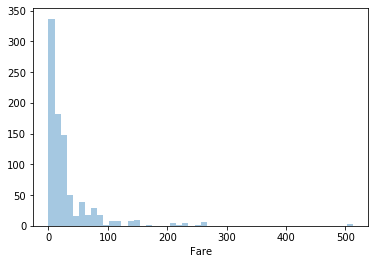

In [22]:
sns.distplot(train_data['Fare'], bins=50, kde=False)

In [23]:
train_data['Age'].mean()

29.69911764705882

In [24]:
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)

In [25]:
train_data['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [26]:
sex=pd.get_dummies(train_data['Sex'], drop_first=True)

In [27]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.000000,1,0,7.2500
1,2,1,1,female,38.000000,1,0,71.2833
2,3,1,3,female,26.000000,0,0,7.9250
3,4,1,1,female,35.000000,1,0,53.1000
4,5,0,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000
887,888,1,1,female,19.000000,0,0,30.0000
888,889,0,3,female,29.699118,1,2,23.4500
889,890,1,1,male,26.000000,0,0,30.0000


In [28]:

train_data=pd.concat([train_data,sex],axis=1)

In [29]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,male
0,1,0,3,male,22.0,1,0,7.2500,1
1,2,1,1,female,38.0,1,0,71.2833,0
2,3,1,3,female,26.0,0,0,7.9250,0
3,4,1,1,female,35.0,1,0,53.1000,0
4,5,0,3,male,35.0,0,0,8.0500,1


In [30]:
train_data.drop('Sex', axis=1, inplace=True)

In [31]:
train_data.drop('Survived', axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male
0,1,3,22.0,1,0,7.2500,1
1,2,1,38.0,1,0,71.2833,0
2,3,3,26.0,0,0,7.9250,0
3,4,1,35.0,1,0,53.1000,0
4,5,3,35.0,0,0,8.0500,1


In [32]:
train_data['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test=train_test_split(train_data.drop('Survived', axis=1),train_data['Survived'], test_size=0.2, random_state=0 )

In [35]:
from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression()
logistic_regression.fit(x_train,y_train)

C:\Users\vihaan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [36]:
predictions=logistic_regression.predict(x_test)

In [37]:
predictions

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
accuracy=confusion_matrix(y_test,predictions)

In [40]:
accuracy

array([[98, 12],
       [24, 45]], dtype=int64)

In [41]:
accuracy=accuracy_score(y_test,predictions)

In [42]:
accuracy

0.7988826815642458

In [43]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [44]:
test_data.drop(columns=['Embarked'])

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500
414,1306,1,female,39.0,0,0,108.9000
415,1307,3,male,38.5,0,0,7.2500
416,1308,3,male,NaN,0,0,8.0500


In [45]:
sex_test=pd.get_dummies(test_data['Sex'], drop_first=True)

In [46]:
test_data=pd.concat([test_data, sex_test],axis=1)

In [47]:
test_data.drop(columns=['Sex','Embarked'], inplace=True)

In [48]:
test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male
0,892,3,34.5,0,0,7.8292,1
1,893,3,47.0,1,0,7.0000,0
2,894,2,62.0,0,0,9.6875,1
3,895,3,27.0,0,0,8.6625,1
4,896,3,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,1305,3,NaN,0,0,8.0500,1
414,1306,1,39.0,0,0,108.9000,0
415,1307,3,38.5,0,0,7.2500,1
416,1308,3,NaN,0,0,8.0500,1


In [57]:
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)
test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male
0,892,3,34.50000,0,0,7.8292,1
1,893,3,47.00000,1,0,7.0000,0
2,894,2,62.00000,0,0,9.6875,1
3,895,3,27.00000,0,0,8.6625,1
4,896,3,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,1
414,1306,1,39.00000,0,0,108.9000,0
415,1307,3,38.50000,0,0,7.2500,1
416,1308,3,30.27259,0,0,8.0500,1


In [58]:
test_data.head(155)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male
0,892,3,34.50000,0,0,7.829200,1
1,893,3,47.00000,1,0,7.000000,0
2,894,2,62.00000,0,0,9.687500,1
3,895,3,27.00000,0,0,8.662500,1
4,896,3,22.00000,1,1,12.287500,0
...,...,...,...,...,...,...,...
150,1042,1,23.00000,0,1,83.158300,0
151,1043,3,30.27259,0,0,7.895800,1
152,1044,3,60.50000,0,0,35.627188,1
153,1045,3,36.00000,0,2,12.183300,0


In [59]:
test_x = test_data
test_predictions = logistic_regression.predict(test_x)

In [60]:
test_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [61]:
test_data['survived_test']=test_predictions

In [65]:
test_data['survived_test']

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: survived_test, Length: 418, dtype: int64

In [66]:
test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,survived_test
0,892,3,34.50000,0,0,7.8292,1,0
1,893,3,47.00000,1,0,7.0000,0,0
2,894,2,62.00000,0,0,9.6875,1,0
3,895,3,27.00000,0,0,8.6625,1,0
4,896,3,22.00000,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,1,0
414,1306,1,39.00000,0,0,108.9000,0,1
415,1307,3,38.50000,0,0,7.2500,1,0
416,1308,3,30.27259,0,0,8.0500,1,0
